In [1]:
import torch
import numpy as np

import ast
%load_ext autoreload
%autoreload 2

In [ ]:
# import sys
# sys.version

In [3]:
import model
import train
import utilities

In [4]:
import ast
import os

from collections import Counter, defaultdict

In [34]:
data = utilities.read_all_anytask()

In [35]:
data = utilities.filter_by_count(data, 0, 70)

In [36]:
# print(sorted(data.keys()))

In [38]:
batch_sampler = train.StratifiedBatcherPreprocessed(data, 64, 0.8)
# batch_sampler = train.NameBatcher(data, 64, train_problems, test_problems)

In [30]:
utilities.load_batcher(batch_sampler, "./experiments/anytask/regularized/names_separate_coef/")

In [31]:
batch_sampler.classes

['Dragunov_Nikita',
 'Dzhenakov_Dmitriy',
 'Filimonov_Vladislav',
 'Fominskaya_Galina',
 'Iavorskaia_Maria',
 'Medvedev_Alex',
 'Medvedev_Dmitry',
 'Poletaev_Vsevolod',
 'Ponomareva_Lubov',
 'Rudnev_Viktor',
 'Sagaydak_Oleg',
 'Shamshiev_Mamat',
 'Shatalov_Nikolay',
 'Shestakova_Anna',
 'Skachkov_Nikolay',
 'Solotky_Michael',
 'Somov_Ivan',
 'Tsypin_Artem',
 'Zakharenko_Vadim']

In [47]:
import astor

In [49]:
# for b in batch_sampler.train():
#     print(astor.to_source(b[0][0]))

In [11]:
batch_sampler.get_n_classes()

19

In [12]:
np.unique(batch_sampler.y_train, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 array([22, 17, 19, 24, 25, 23, 24, 18, 15, 27, 21, 22, 10, 22, 20, 27, 19,
        19, 11]))

In [13]:
np.unique(batch_sampler.y_test, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 array([6, 5, 5, 7, 7, 6, 7, 5, 4, 7, 6, 6, 3, 6, 6, 7, 5, 5, 3]))

In [14]:
model_params = {
    "n_classes":batch_sampler.get_n_classes(),
    "encoder_params": {
        "embedding_dims":100,
        "combiner_dims":100,
        "name_embedding_dims":100,
        "dropout":0.2,
        "num_layers":1, "rnn_dropout":0.0,
        "most_common_names_file":"most_common_names_all_datasets.pkl",
        "OOV_ID":0
        
    },
    'regularizer_alpha':0.001,
    'regularizer_alpha_names':0.0001
}

In [15]:
track_metric = {
    "metric_name":"accuracy",
    "function":train.validate_max
}

In [16]:
path = "experiments/anytask/regularized/names_separate_coef/"
if os.path.exists(path):
    raise ValueError()

ValueError: 

In [17]:
cls = model.NameModel(model_params)

In [18]:
# trainer = train.Trainer(cls, torch.nn.CrossEntropyLoss(), torch.optim.SGD(cls.parameters(), lr=0.01, momentum=0.9))
trainer = train.Trainer(cls, torch.nn.CrossEntropyLoss(), torch.optim.Adam(cls.parameters()), track_metric, path)

In [19]:
torch.set_num_threads(1)

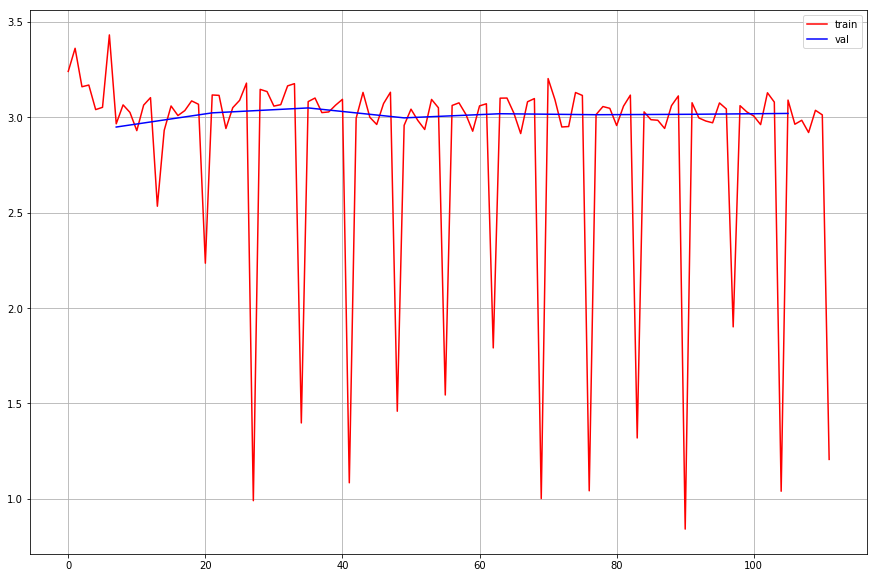

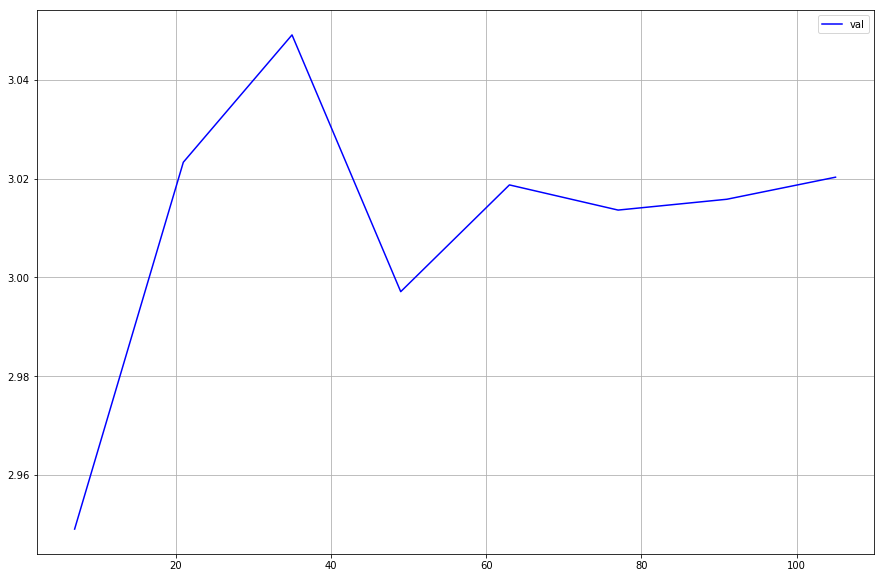

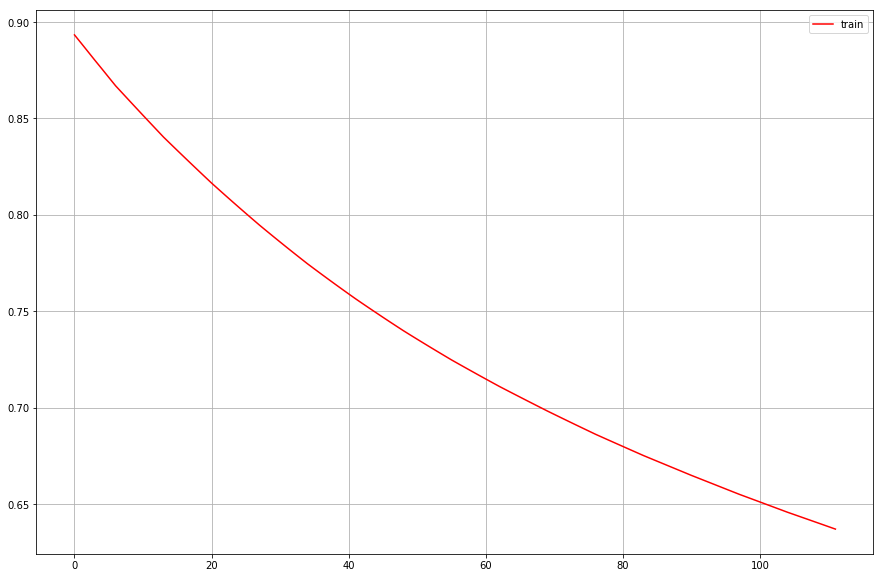

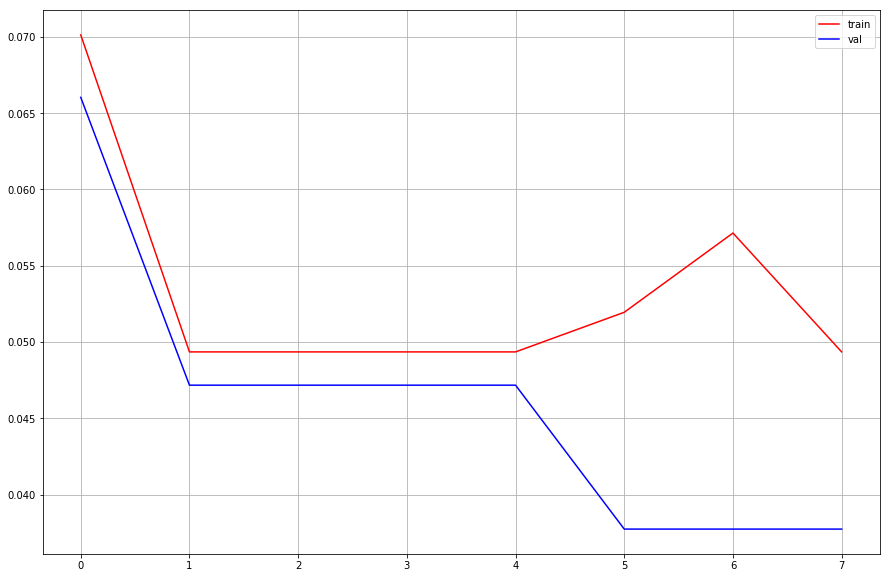

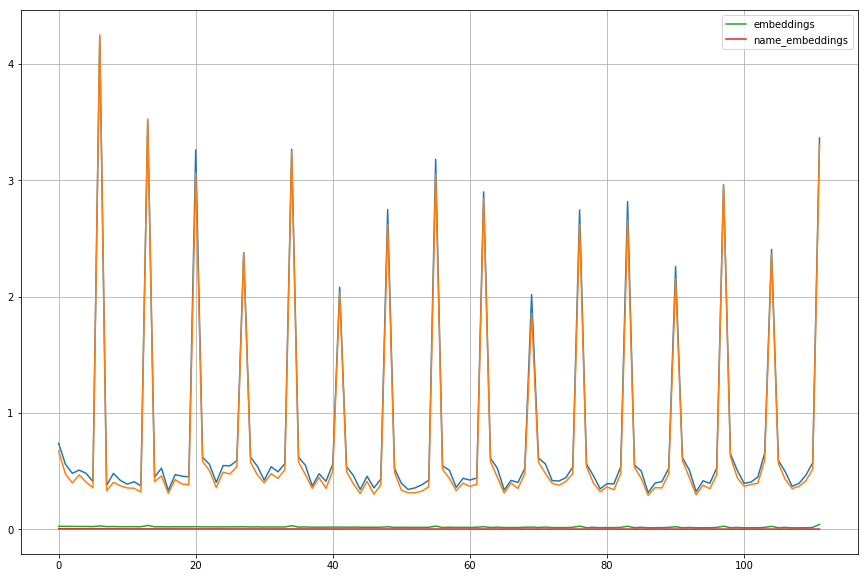

KeyboardInterrupt: 

In [20]:
trainer.train(batch_sampler, {"n_epochs":100, "validate_every":2})

In [22]:
for code in batch_sampler.test_data.values():
    print(code)
    break

In [32]:
batch_sampler.x_raw_train

[]

In [35]:
import gc
gc.collect()

13567

Accuracy =  0.9299492385786802


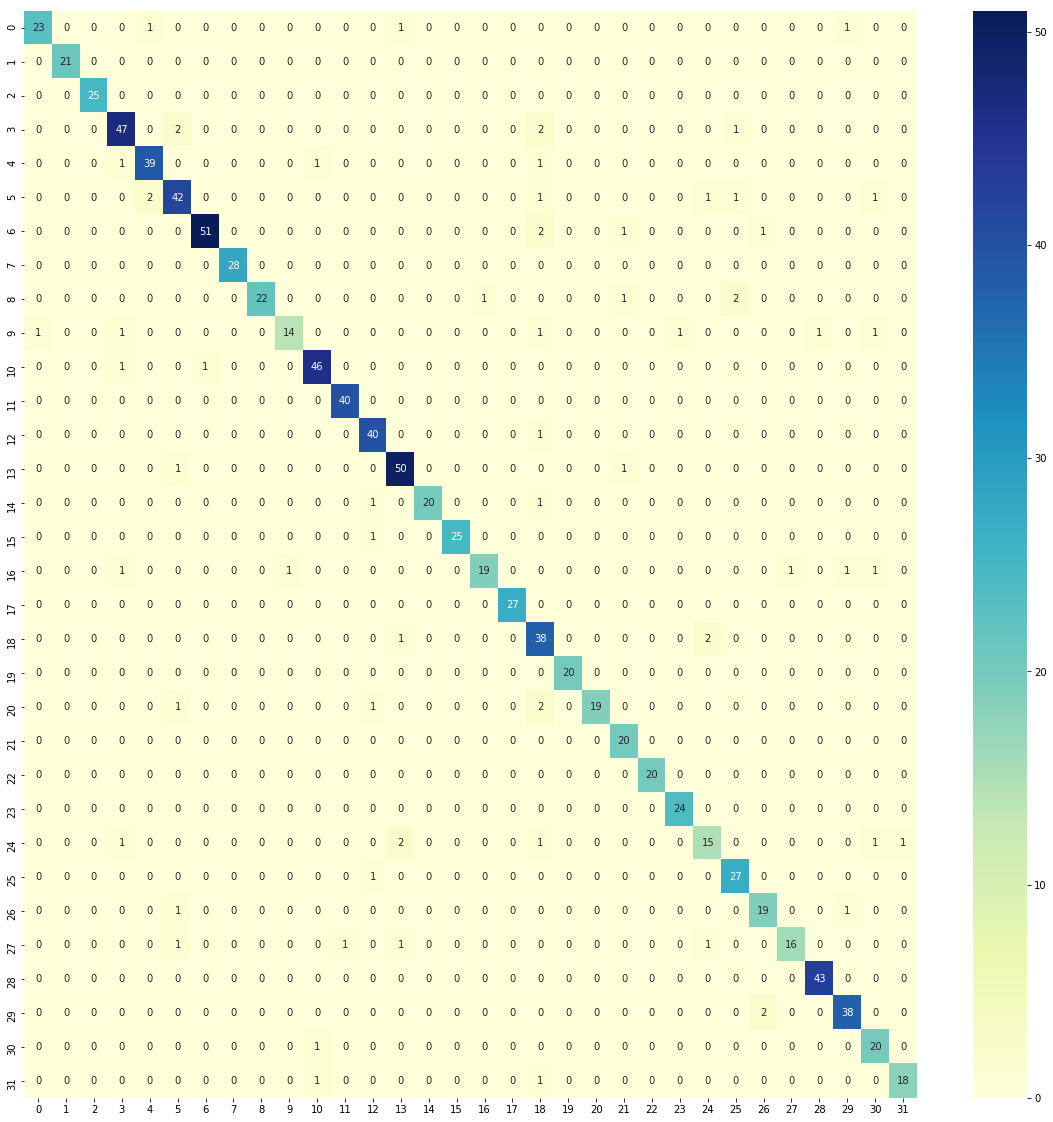

In [36]:
utilities.print_confusion_matrix(cls, batch_sampler.x_train, batch_sampler.y_train)

Accuracy =  0.3970037453183521


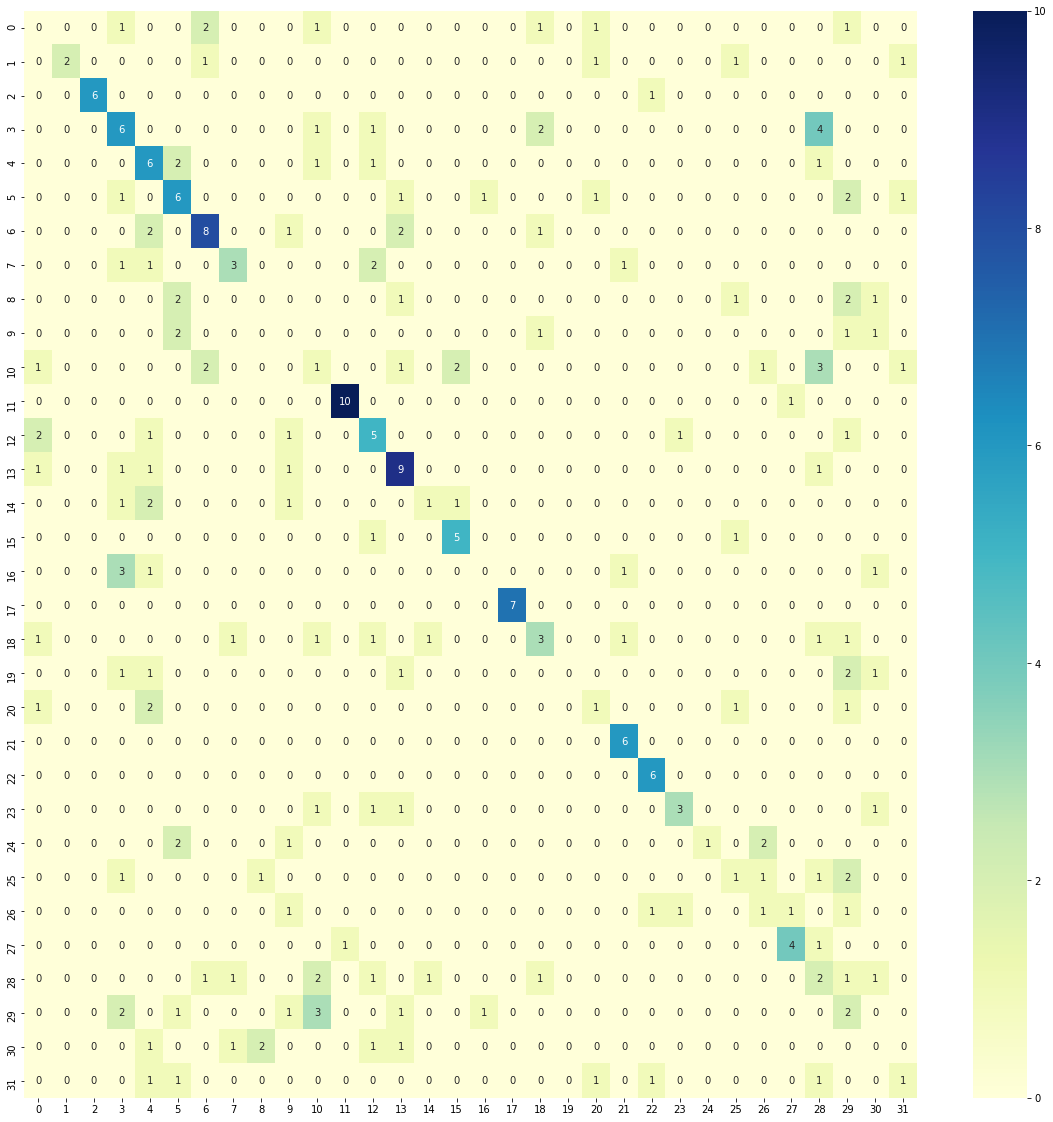

In [37]:
utilities.print_confusion_matrix(cls, batch_sampler.x_test, batch_sampler.y_test)

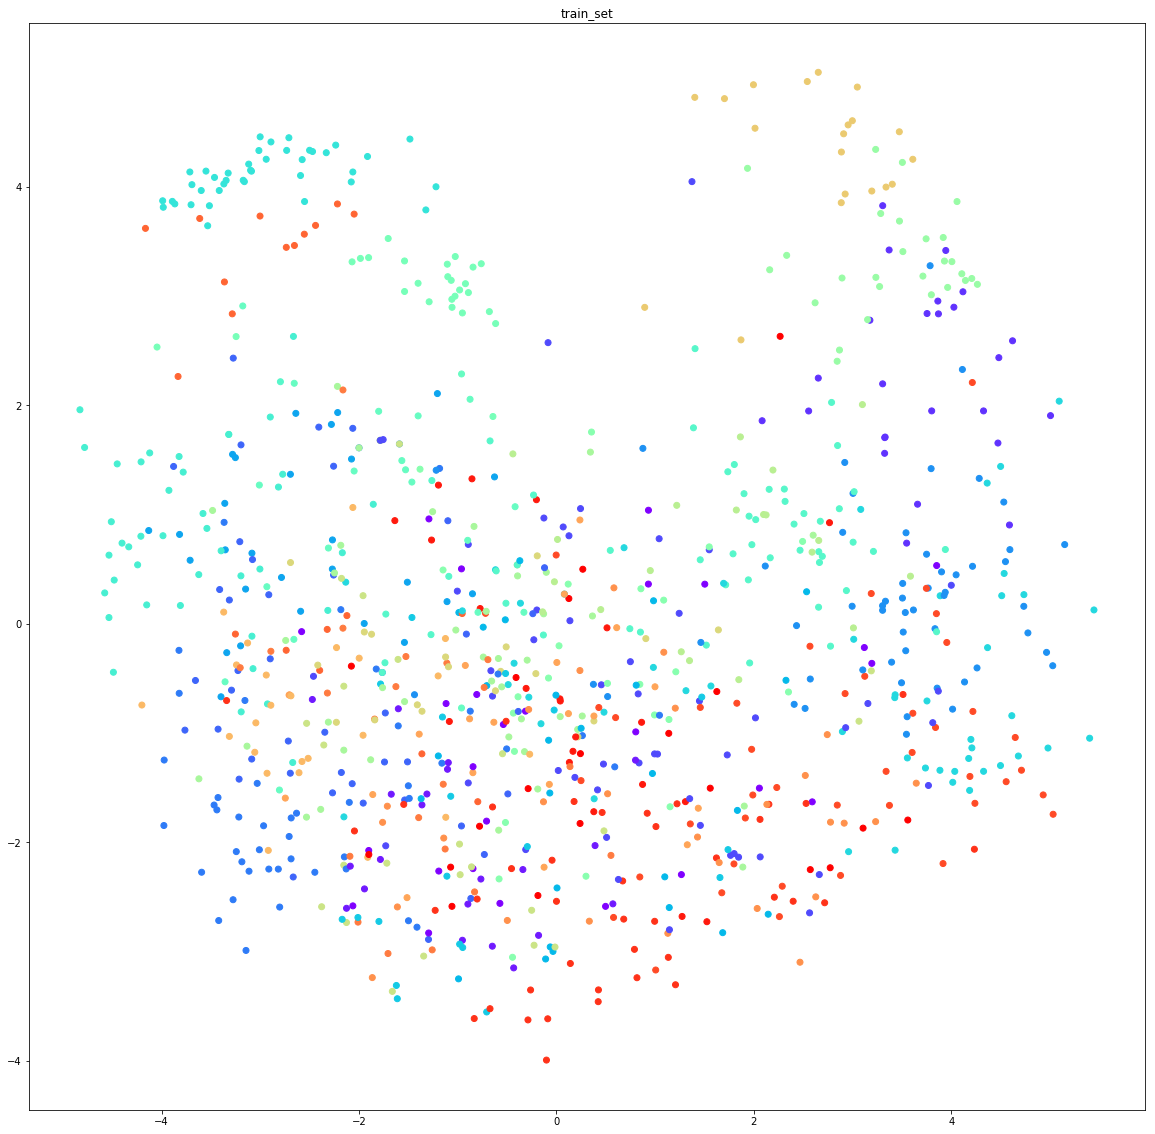

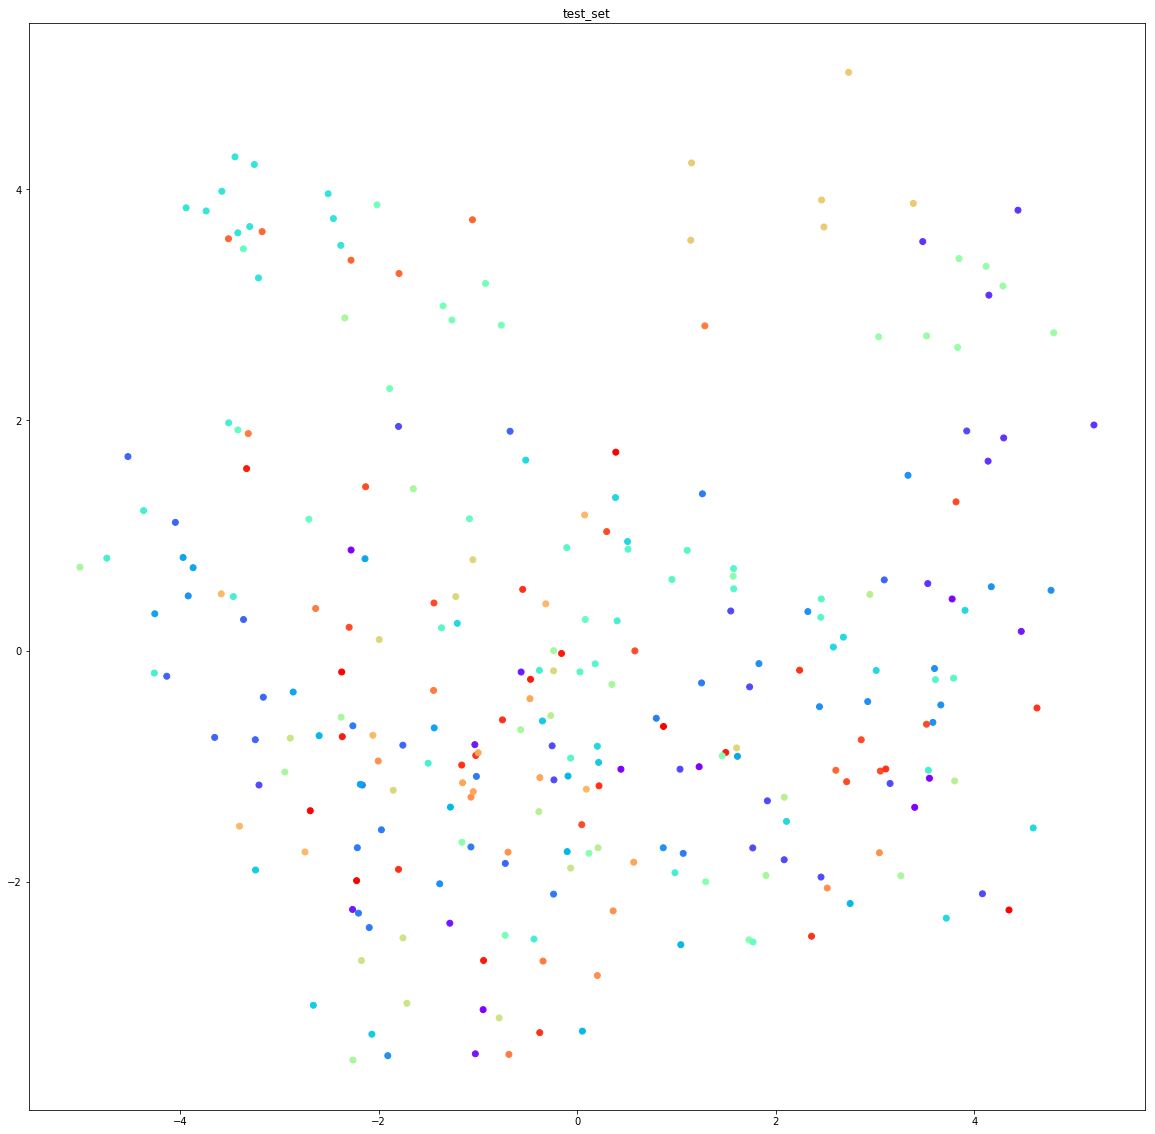

In [38]:
utilities.plot_pca(batch_sampler, cls)